**COLOR CONVERSION**

**Grayscale**

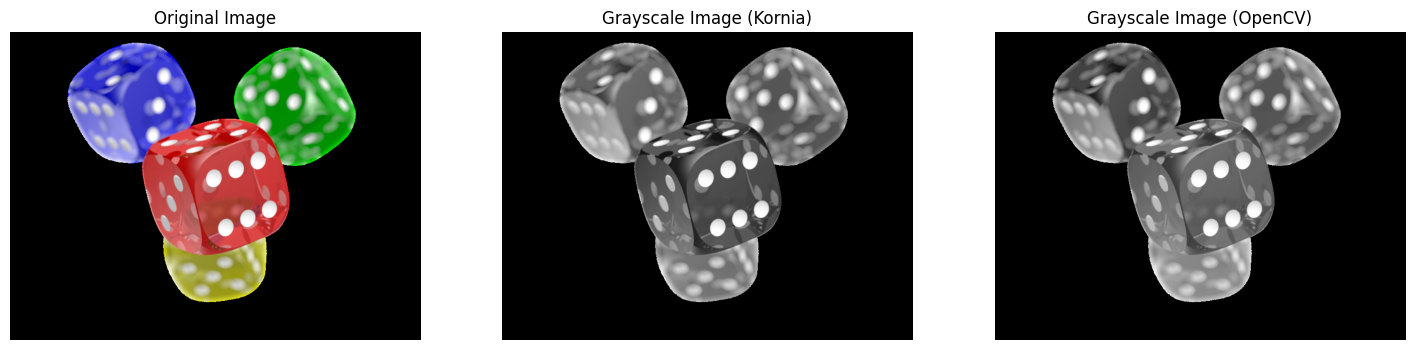

Waktu Eksekusi Grayscale Kornia (rata-rata dari 10 iterasi): 0.001418 detik
Waktu Eksekusi Grayscale OpenCV (rata-rata dari 10 iterasi): 0.000238 detik
Ukuran File Sebelum Grayscale Kornia: 226933 bytes
Ukuran File Setelah Grayscale Kornia: 1920000 bytes
Ukuran File Sebelum Grayscale OpenCV: 226933 bytes
Ukuran File Setelah Grayscale OpenCV: 79320 bytes


In [ ]:
!pip install kornia

import cv2
import numpy as np
from matplotlib import pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import torch
import kornia
import kornia.color as color
from torchvision import transforms
import time

# URL gambar (ganti dengan URL gambar yang valid)
image_url = "https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png"

# Baca gambar dari URL (OpenCV)
response = requests.get(image_url)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
image_opencv = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Periksa apakah gambar berhasil dibaca (OpenCV)
if image_opencv is not None:
    # Konversi BGR ke RGB (untuk ditampilkan dengan benar di matplotlib)
    image_rgb_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGB)

    # Konversi ke Grayscale (OpenCV)
    grayscale_image_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2GRAY)

    # Konversi ke Grayscale (Kornia)
    image_tensor = transforms.ToTensor()(Image.fromarray(image_opencv))

    # Mengukur waktu eksekusi dan ukuran file untuk Grayscale dari Kornia
    start_time_kornia = time.time()
    size_before_kornia = len(image_array)
    for _ in range(10):
        grayscale_image_kornia = color.rgb_to_grayscale(image_tensor.unsqueeze(0))
    end_time_kornia = time.time()
    elapsed_time_kornia = end_time_kornia - start_time_kornia
    size_after_kornia = len(BytesIO(grayscale_image_kornia.numpy().tobytes()).read())

    # Mengukur waktu eksekusi dan ukuran file untuk Grayscale dari OpenCV
    start_time_opencv = time.time()
    size_before_opencv = len(image_array)
    for _ in range(10):
        grayscale_image_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2GRAY)
    end_time_opencv = time.time()
    elapsed_time_opencv = end_time_opencv - start_time_opencv
    size_after_opencv = len(BytesIO(cv2.imencode('.png', grayscale_image_opencv)[1]).read())

    # Set up subplots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

    # Tampilkan gambar original
    axes[0].imshow(image_rgb_opencv)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Tampilkan gambar dalam Grayscale (Kornia)
    axes[1].imshow(grayscale_image_kornia[0][0], cmap='gray')
    axes[1].set_title('Grayscale Image (Kornia)')
    axes[1].axis('off')

    # Tampilkan gambar dalam Grayscale (OpenCV)
    axes[2].imshow(grayscale_image_opencv, cmap='gray')
    axes[2].set_title('Grayscale Image (OpenCV)')
    axes[2].axis('off')

    # Tampilkan plot
    plt.show()

    # Tampilkan waktu eksekusi
    print(f"Waktu Eksekusi Grayscale Kornia (rata-rata dari 10 iterasi): {elapsed_time_kornia / 10:.6f} detik")
    print(f"Waktu Eksekusi Grayscale OpenCV (rata-rata dari 10 iterasi): {elapsed_time_opencv / 10:.6f} detik")

    # Tampilkan ukuran file
    print(f"Ukuran File Sebelum Grayscale Kornia: {size_before_kornia} bytes")
    print(f"Ukuran File Setelah Grayscale Kornia: {size_after_kornia} bytes")
    print(f"Ukuran File Sebelum Grayscale OpenCV: {size_before_opencv} bytes")
    print(f"Ukuran File Setelah Grayscale OpenCV: {size_after_opencv} bytes")
else:
    print(f"Failed to read the image from the URL: {image_url}")


**YCbCr**

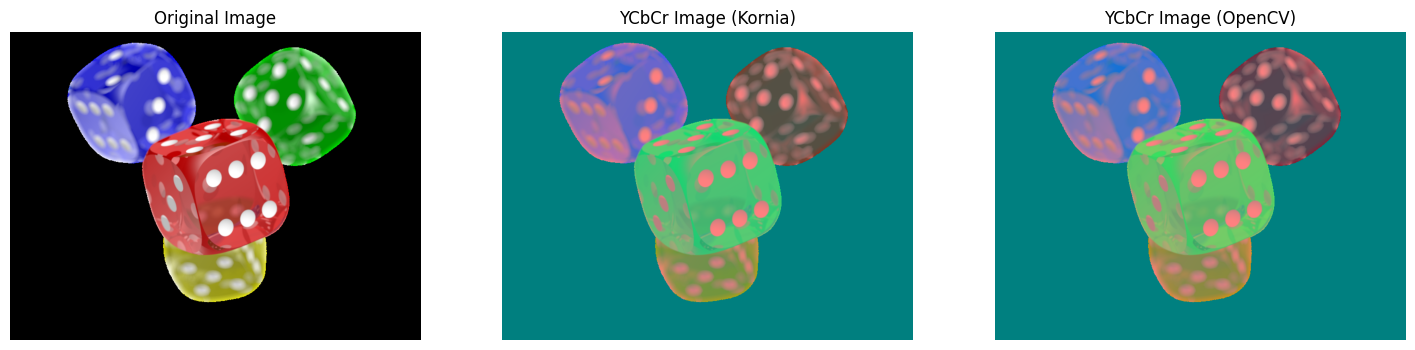

Waktu Eksekusi YCbCr Kornia (rata-rata dari 10 iterasi): 0.003389 detik
Waktu Eksekusi YCbCr OpenCV (rata-rata dari 10 iterasi): 0.000435 detik
Ukuran File Sebelum YCbCr Kornia: 226933 bytes
Ukuran File Setelah YCbCr Kornia: 5760000 bytes
Ukuran File Sebelum YCbCr OpenCV: 226933 bytes
Ukuran File Setelah YCbCr OpenCV: 189022 bytes


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import torch
import kornia
import kornia.color as color
from torchvision import transforms
import time

# URL gambar (ganti dengan URL gambar yang valid)
image_url = "https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png"

# Baca gambar dari URL (OpenCV)
response = requests.get(image_url)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
image_opencv = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Periksa apakah gambar berhasil dibaca (OpenCV)
if image_opencv is not None:
    # Konversi BGR ke RGB (untuk ditampilkan dengan benar di matplotlib)
    image_rgb_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGB)

    # Konversi ke YCbCr (OpenCV)
    ycbcr_image_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2YCrCb)

    # Konversi ke YCbCr (Kornia)
    image_tensor = transforms.ToTensor()(Image.fromarray(image_opencv))

    # Mengukur waktu eksekusi dan ukuran file untuk YCbCr dari Kornia
    start_time_kornia = time.time()
    size_before_kornia = len(image_array)
    for _ in range(10):
        ycbcr_image_kornia = color.rgb_to_ycbcr(image_tensor.unsqueeze(0))
    end_time_kornia = time.time()
    elapsed_time_kornia = end_time_kornia - start_time_kornia
    size_after_kornia = len(BytesIO(ycbcr_image_kornia.numpy().tobytes()).read())

    # Mengukur waktu eksekusi dan ukuran file untuk YCbCr dari OpenCV
    start_time_opencv = time.time()
    size_before_opencv = len(image_array)
    for _ in range(10):
        ycbcr_image_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2YCrCb)
    end_time_opencv = time.time()
    elapsed_time_opencv = end_time_opencv - start_time_opencv
    size_after_opencv = len(BytesIO(cv2.imencode('.png', ycbcr_image_opencv)[1]).read())

    # Set up subplots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

    # Tampilkan gambar original
    axes[0].imshow(image_rgb_opencv)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Tampilkan gambar dalam color space YCbCr (Kornia)
    axes[1].imshow(ycbcr_image_kornia[0].permute(1, 2, 0))
    axes[1].set_title('YCbCr Image (Kornia)')
    axes[1].axis('off')

    # Tampilkan gambar dalam color space YCbCr (OpenCV)
    axes[2].imshow(ycbcr_image_opencv)
    axes[2].set_title('YCbCr Image (OpenCV)')
    axes[2].axis('off')

    # Tampilkan plot
    plt.show()

    # Tampilkan waktu eksekusi
    print(f"Waktu Eksekusi YCbCr Kornia (rata-rata dari 10 iterasi): {elapsed_time_kornia / 10:.6f} detik")
    print(f"Waktu Eksekusi YCbCr OpenCV (rata-rata dari 10 iterasi): {elapsed_time_opencv / 10:.6f} detik")

    # Tampilkan ukuran file
    print(f"Ukuran File Sebelum YCbCr Kornia: {size_before_kornia} bytes")
    print(f"Ukuran File Setelah YCbCr Kornia: {size_after_kornia} bytes")
    print(f"Ukuran File Sebelum YCbCr OpenCV: {size_before_opencv} bytes")
    print(f"Ukuran File Setelah YCbCr OpenCV: {size_after_opencv} bytes")
else:
    print(f"Failed to read the image from the URL: {image_url}")


**LAB**

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.7/705.7 kB 11.8 MB/s eta 0:00:00


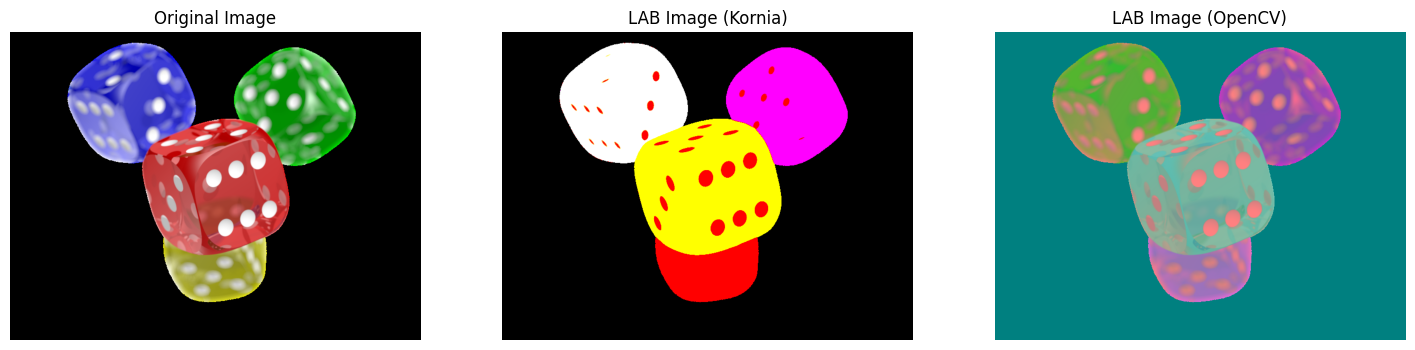

Waktu Eksekusi LAB Kornia (rata-rata dari 10 iterasi): 0.044542 detik
Waktu Eksekusi LAB OpenCV (rata-rata dari 10 iterasi): 0.002866 detik
Ukuran File Sebelum LAB Kornia: 226933 bytes
Ukuran File Setelah LAB Kornia: 5760000 bytes
Ukuran File Sebelum LAB OpenCV: 226933 bytes
Ukuran File Setelah LAB OpenCV: 186104 bytes


In [ ]:
!pip install kornia

import cv2
import numpy as np
from matplotlib import pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import torch
import kornia
import kornia.color as color
from torchvision import transforms
import time

# URL gambar (ganti dengan URL gambar yang valid)
image_url = "https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png"

# Baca gambar dari URL (OpenCV)
response = requests.get(image_url)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
image_opencv = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Periksa apakah gambar berhasil dibaca (OpenCV)
if image_opencv is not None:
    # Konversi BGR ke RGB (untuk ditampilkan dengan benar di matplotlib)
    image_rgb_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGB)

    # Konversi ke LAB (OpenCV)
    lab_image_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2LAB)

    # Konversi ke LAB (Kornia)
    image_tensor = transforms.ToTensor()(Image.fromarray(image_opencv))

    # Mengukur waktu eksekusi dan ukuran file untuk LAB dari Kornia
    start_time_kornia = time.time()
    size_before_kornia = len(image_array)
    for _ in range(10):
        lab_image_kornia = color.rgb_to_lab(image_tensor.unsqueeze(0))
    end_time_kornia = time.time()
    elapsed_time_kornia = end_time_kornia - start_time_kornia
    size_after_kornia = len(BytesIO(lab_image_kornia.numpy().tobytes()).read())

    # Mengukur waktu eksekusi dan ukuran file untuk LAB dari OpenCV
    start_time_opencv = time.time()
    size_before_opencv = len(image_array)
    for _ in range(10):
        lab_image_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2LAB)
    end_time_opencv = time.time()
    elapsed_time_opencv = end_time_opencv - start_time_opencv
    size_after_opencv = len(BytesIO(cv2.imencode('.png', lab_image_opencv)[1]).read())

    # Set up subplots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

    # Tampilkan gambar original
    axes[0].imshow(image_rgb_opencv)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Tampilkan gambar dalam color space LAB (Kornia)
    axes[1].imshow(lab_image_kornia[0].permute(1, 2, 0))
    axes[1].set_title('LAB Image (Kornia)')
    axes[1].axis('off')

    # Tampilkan gambar dalam color space LAB (OpenCV)
    axes[2].imshow(lab_image_opencv)
    axes[2].set_title('LAB Image (OpenCV)')
    axes[2].axis('off')

    # Tampilkan plot
    plt.show()

    # Tampilkan waktu eksekusi
    print(f"Waktu Eksekusi LAB Kornia (rata-rata dari 10 iterasi): {elapsed_time_kornia / 10:.6f} detik")
    print(f"Waktu Eksekusi LAB OpenCV (rata-rata dari 10 iterasi): {elapsed_time_opencv / 10:.6f} detik")

    # Tampilkan ukuran file
    print(f"Ukuran File Sebelum LAB Kornia: {size_before_kornia} bytes")
    print(f"Ukuran File Setelah LAB Kornia: {size_after_kornia} bytes")
    print(f"Ukuran File Sebelum LAB OpenCV: {size_before_opencv} bytes")
    print(f"Ukuran File Setelah LAB OpenCV: {size_after_opencv} bytes")
else:
    print(f"Failed to read the image from the URL: {image_url}")


**HSV**

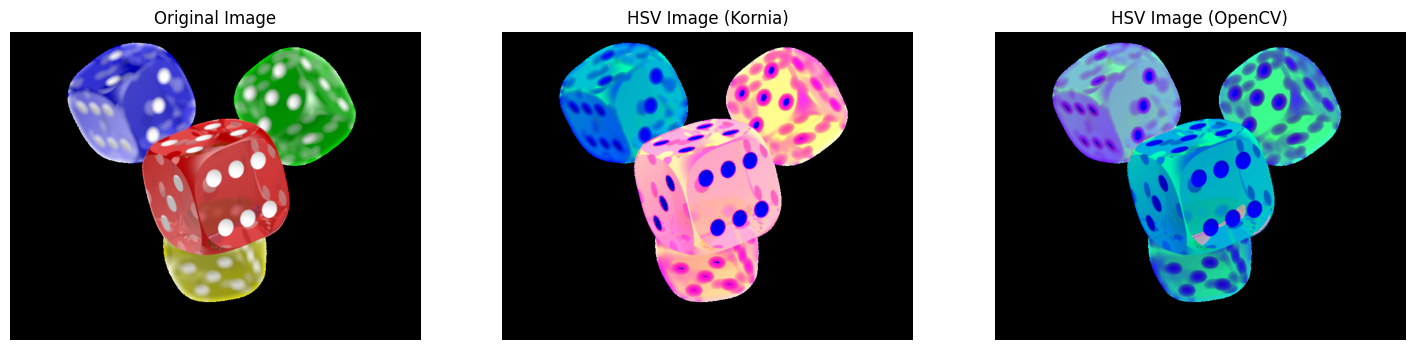

Waktu Eksekusi HSV Kornia (rata-rata dari 10 iterasi): 0.093662 detik
Waktu Eksekusi HSV OpenCV (rata-rata dari 10 iterasi): 0.004804 detik
Ukuran File Sebelum HSV Kornia: 226933 bytes
Ukuran File Setelah HSV Kornia: 5760000 bytes
Ukuran File Sebelum HSV OpenCV: 226933 bytes
Ukuran File Setelah HSV OpenCV: 189200 bytes


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import torch
import kornia
import kornia.color as color
from torchvision import transforms
import time

# URL gambar (ganti dengan URL gambar yang valid)
image_url = "https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png"

# Baca gambar dari URL (OpenCV)
response = requests.get(image_url)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
image_opencv = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Periksa apakah gambar berhasil dibaca (OpenCV)
if image_opencv is not None:
    # Konversi BGR ke RGB (untuk ditampilkan dengan benar di matplotlib)
    image_rgb_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGB)

    # Konversi ke HSV (OpenCV)
    hsv_image_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2HSV)

    # Konversi ke HSV (Kornia)
    image_tensor = transforms.ToTensor()(Image.fromarray(image_opencv))

    # Mengukur waktu eksekusi dan ukuran file untuk HSV dari Kornia
    start_time_kornia = time.time()
    size_before_kornia = len(image_array)
    for _ in range(10):
        hsv_image_kornia = color.rgb_to_hsv(image_tensor.unsqueeze(0))
    end_time_kornia = time.time()
    elapsed_time_kornia = end_time_kornia - start_time_kornia
    size_after_kornia = len(BytesIO(hsv_image_kornia.numpy().tobytes()).read())

    # Mengukur waktu eksekusi dan ukuran file untuk HSV dari OpenCV
    start_time_opencv = time.time()
    size_before_opencv = len(image_array)
    for _ in range(10):
        hsv_image_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2HSV)
    end_time_opencv = time.time()
    elapsed_time_opencv = end_time_opencv - start_time_opencv
    size_after_opencv = len(BytesIO(cv2.imencode('.png', hsv_image_opencv)[1]).read())

    # Set up subplots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

    # Tampilkan gambar original
    axes[0].imshow(image_rgb_opencv)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Tampilkan gambar dalam color space HSV (Kornia)
    axes[1].imshow(hsv_image_kornia[0].permute(1, 2, 0))
    axes[1].set_title('HSV Image (Kornia)')
    axes[1].axis('off')

    # Tampilkan gambar dalam color space HSV (OpenCV)
    axes[2].imshow(hsv_image_opencv)
    axes[2].set_title('HSV Image (OpenCV)')
    axes[2].axis('off')

    # Tampilkan plot
    plt.show()

    # Tampilkan waktu eksekusi
    print(f"Waktu Eksekusi HSV Kornia (rata-rata dari 10 iterasi): {elapsed_time_kornia / 10:.6f} detik")
    print(f"Waktu Eksekusi HSV OpenCV (rata-rata dari 10 iterasi): {elapsed_time_opencv / 10:.6f} detik")

    # Tampilkan ukuran file
    print(f"Ukuran File Sebelum HSV Kornia: {size_before_kornia} bytes")
    print(f"Ukuran File Setelah HSV Kornia: {size_after_kornia} bytes")
    print(f"Ukuran File Sebelum HSV OpenCV: {size_before_opencv} bytes")
    print(f"Ukuran File Setelah HSV OpenCV: {size_after_opencv} bytes")
else:
    print(f"Failed to read the image from the URL: {image_url}")


**HLS**

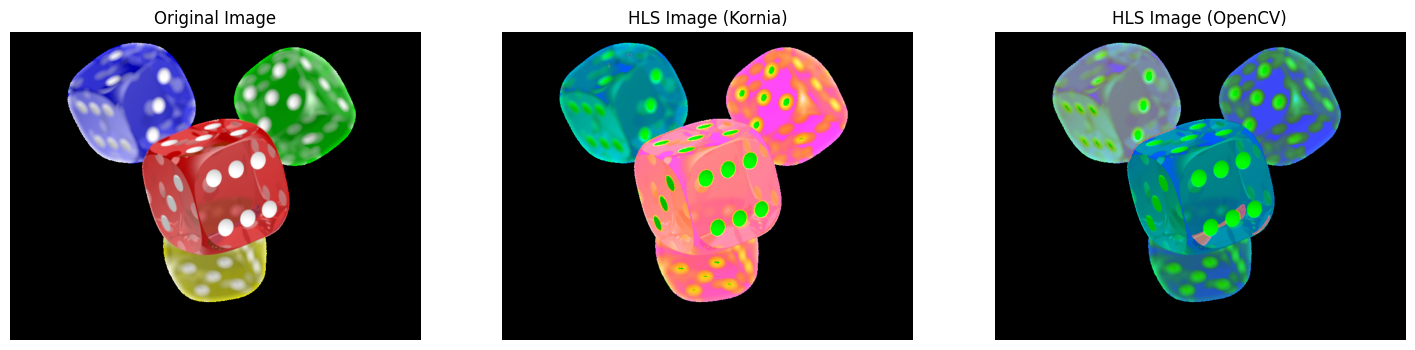

Waktu Eksekusi HLS Kornia (rata-rata dari 10 iterasi): 0.028358 detik
Waktu Eksekusi HLS OpenCV (rata-rata dari 10 iterasi): 0.001174 detik
Ukuran File Sebelum HLS Kornia: 226933 bytes
Ukuran File Setelah HLS Kornia: 5760000 bytes
Ukuran File Sebelum HLS OpenCV: 226933 bytes
Ukuran File Setelah HLS OpenCV: 196366 bytes


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import torch
import kornia
import kornia.color as color
from torchvision import transforms
import time

# URL gambar (ganti dengan URL gambar yang valid)
image_url = "https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png"

# Baca gambar dari URL (OpenCV)
response = requests.get(image_url)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
image_opencv = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Periksa apakah gambar berhasil dibaca (OpenCV)
if image_opencv is not None:
    # Konversi BGR ke RGB (untuk ditampilkan dengan benar di matplotlib)
    image_rgb_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGB)

    # Konversi ke HLS (OpenCV)
    hls_image_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2HLS)

    # Konversi ke HLS (Kornia)
    image_tensor = transforms.ToTensor()(Image.fromarray(image_opencv))

    # Mengukur waktu eksekusi dan ukuran file untuk HLS dari Kornia
    start_time_kornia = time.time()
    size_before_kornia = len(image_array)
    for _ in range(10):
        hls_image_kornia = color.rgb_to_hls(image_tensor.unsqueeze(0))
    end_time_kornia = time.time()
    elapsed_time_kornia = end_time_kornia - start_time_kornia
    size_after_kornia = len(BytesIO(hls_image_kornia.numpy().tobytes()).read())

    # Mengukur waktu eksekusi dan ukuran file untuk HLS dari OpenCV
    start_time_opencv = time.time()
    size_before_opencv = len(image_array)
    for _ in range(10):
        hls_image_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2HLS)
    end_time_opencv = time.time()
    elapsed_time_opencv = end_time_opencv - start_time_opencv
    size_after_opencv = len(BytesIO(cv2.imencode('.png', hls_image_opencv)[1]).read())

    # Set up subplots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

    # Tampilkan gambar original
    axes[0].imshow(image_rgb_opencv)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Tampilkan gambar dalam color space HLS (Kornia)
    axes[1].imshow(hls_image_kornia[0].permute(1, 2, 0))
    axes[1].set_title('HLS Image (Kornia)')
    axes[1].axis('off')

    # Tampilkan gambar dalam color space HLS (OpenCV)
    axes[2].imshow(hls_image_opencv)
    axes[2].set_title('HLS Image (OpenCV)')
    axes[2].axis('off')

    # Tampilkan plot
    plt.show()

    # Tampilkan waktu eksekusi
    print(f"Waktu Eksekusi HLS Kornia (rata-rata dari 10 iterasi): {elapsed_time_kornia / 10:.6f} detik")
    print(f"Waktu Eksekusi HLS OpenCV (rata-rata dari 10 iterasi): {elapsed_time_opencv / 10:.6f} detik")

    # Tampilkan ukuran file
    print(f"Ukuran File Sebelum HLS Kornia: {size_before_kornia} bytes")
    print(f"Ukuran File Setelah HLS Kornia: {size_after_kornia} bytes")
    print(f"Ukuran File Sebelum HLS OpenCV: {size_before_opencv} bytes")
    print(f"Ukuran File Setelah HLS OpenCV: {size_after_opencv} bytes")
else:
    print(f"Failed to read the image from the URL: {image_url}")


**XYZ**

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.7/705.7 kB 9.2 MB/s eta 0:00:00


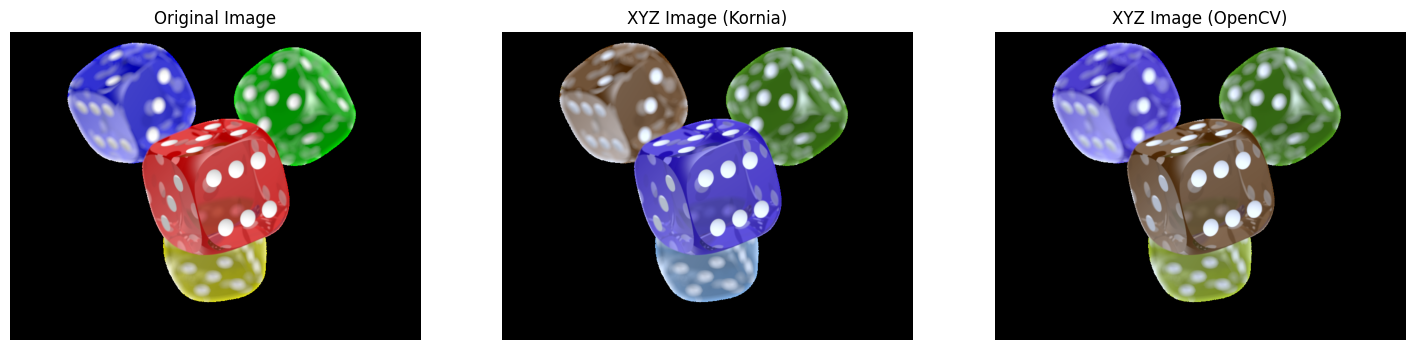

Waktu Eksekusi XYZ Kornia (rata-rata dari 10 iterasi): 0.007636 detik
Waktu Eksekusi XYZ OpenCV (rata-rata dari 10 iterasi): 0.001096 detik
Ukuran File Sebelum XYZ Kornia: 226933 bytes
Ukuran File Setelah XYZ Kornia: 5760000 bytes
Ukuran File Sebelum XYZ OpenCV: 226933 bytes
Ukuran File Setelah XYZ OpenCV: 223603 bytes


In [ ]:
!pip install kornia

import cv2
import numpy as np
from matplotlib import pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import torch
import kornia
import kornia.color as color
from torchvision import transforms
import time

# URL gambar (ganti dengan URL gambar yang valid)
image_url = "https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png"

# Baca gambar dari URL (OpenCV)
response = requests.get(image_url)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
image_opencv = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Periksa apakah gambar berhasil dibaca (OpenCV)
if image_opencv is not None:
    # Konversi BGR ke RGB (untuk ditampilkan dengan benar di matplotlib)
    image_rgb_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGB)

    # Konversi ke XYZ (OpenCV)
    xyz_image_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2XYZ)

    # Konversi ke XYZ (Kornia)
    image_tensor = transforms.ToTensor()(Image.fromarray(image_opencv))

    # Mengukur waktu eksekusi dan ukuran file untuk XYZ dari Kornia
    start_time_kornia = time.time()
    size_before_kornia = len(image_array)
    for _ in range(10):
        xyz_image_kornia = color.rgb_to_xyz(image_tensor.unsqueeze(0))
    end_time_kornia = time.time()
    elapsed_time_kornia = end_time_kornia - start_time_kornia
    size_after_kornia = len(BytesIO(xyz_image_kornia.numpy().tobytes()).read())

    # Mengukur waktu eksekusi dan ukuran file untuk XYZ dari OpenCV
    start_time_opencv = time.time()
    size_before_opencv = len(image_array)
    for _ in range(10):
        xyz_image_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2XYZ)
    end_time_opencv = time.time()
    elapsed_time_opencv = end_time_opencv - start_time_opencv
    size_after_opencv = len(BytesIO(cv2.imencode('.png', xyz_image_opencv)[1]).read())

    # Set up subplots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

    # Tampilkan gambar original
    axes[0].imshow(image_rgb_opencv)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Tampilkan gambar dalam color space XYZ (Kornia)
    axes[1].imshow(xyz_image_kornia[0].permute(1, 2, 0))
    axes[1].set_title('XYZ Image (Kornia)')
    axes[1].axis('off')

    # Tampilkan gambar dalam color space XYZ (OpenCV)
    axes[2].imshow(xyz_image_opencv)
    axes[2].set_title('XYZ Image (OpenCV)')
    axes[2].axis('off')

    # Tampilkan plot
    plt.show()

    # Tampilkan waktu eksekusi
    print(f"Waktu Eksekusi XYZ Kornia (rata-rata dari 10 iterasi): {elapsed_time_kornia / 10:.6f} detik")
    print(f"Waktu Eksekusi XYZ OpenCV (rata-rata dari 10 iterasi): {elapsed_time_opencv / 10:.6f} detik")

    # Tampilkan ukuran file
    print(f"Ukuran File Sebelum XYZ Kornia: {size_before_kornia} bytes")
    print(f"Ukuran File Setelah XYZ Kornia: {size_after_kornia} bytes")
    print(f"Ukuran File Sebelum XYZ OpenCV: {size_before_opencv} bytes")
    print(f"Ukuran File Setelah XYZ OpenCV: {size_after_opencv} bytes")
else:
    print(f"Failed to read the image from the URL: {image_url}")


**YUV**

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.7/705.7 kB 6.6 MB/s eta 0:00:00


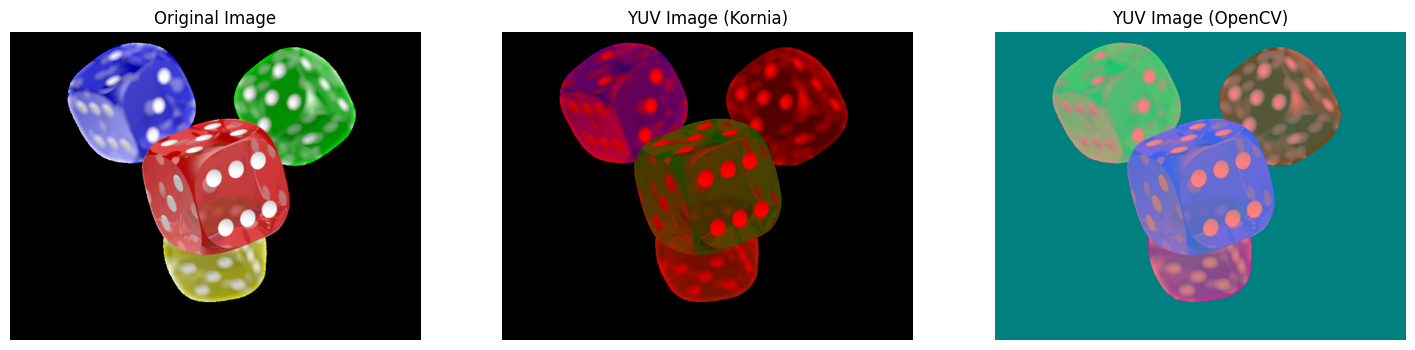

Waktu Eksekusi YUV Kornia (rata-rata dari 10 iterasi): 0.010680 detik
Waktu Eksekusi YUV OpenCV (rata-rata dari 10 iterasi): 0.000755 detik
Ukuran File Sebelum YUV Kornia: 226933 bytes
Ukuran File Setelah YUV Kornia: 5760000 bytes
Ukuran File Sebelum YUV OpenCV: 226933 bytes
Ukuran File Setelah YUV OpenCV: 189991 bytes


In [ ]:
!pip install kornia

import cv2
import numpy as np
from matplotlib import pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import torch
import kornia
import kornia.color as color
from torchvision import transforms
import time

# URL gambar (ganti dengan URL gambar yang valid)
image_url = "https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png"

# Baca gambar dari URL (OpenCV)
response = requests.get(image_url)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
image_opencv = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Periksa apakah gambar berhasil dibaca (OpenCV)
if image_opencv is not None:
    # Konversi BGR ke RGB (untuk ditampilkan dengan benar di matplotlib)
    image_rgb_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGB)

    # Konversi ke YUV (OpenCV)
    yuv_image_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2YUV)

    # Konversi ke YUV (Kornia)
    image_tensor = transforms.ToTensor()(Image.fromarray(image_opencv))

    # Mengukur waktu eksekusi dan ukuran file untuk YUV dari Kornia
    start_time_kornia = time.time()
    size_before_kornia = len(image_array)
    for _ in range(10):
        yuv_image_kornia = color.rgb_to_yuv(image_tensor.unsqueeze(0))
    end_time_kornia = time.time()
    elapsed_time_kornia = end_time_kornia - start_time_kornia
    size_after_kornia = len(BytesIO(yuv_image_kornia.numpy().tobytes()).read())

    # Mengukur waktu eksekusi dan ukuran file untuk YUV dari OpenCV
    start_time_opencv = time.time()
    size_before_opencv = len(image_array)
    for _ in range(10):
        yuv_image_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2YUV)
    end_time_opencv = time.time()
    elapsed_time_opencv = end_time_opencv - start_time_opencv
    size_after_opencv = len(BytesIO(cv2.imencode('.png', yuv_image_opencv)[1]).read())

    # Set up subplots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

    # Tampilkan gambar original
    axes[0].imshow(image_rgb_opencv)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Tampilkan gambar dalam color space YUV (Kornia)
    axes[1].imshow(yuv_image_kornia[0].permute(1, 2, 0))
    axes[1].set_title('YUV Image (Kornia)')
    axes[1].axis('off')

    # Tampilkan gambar dalam color space YUV (OpenCV)
    axes[2].imshow(yuv_image_opencv)
    axes[2].set_title('YUV Image (OpenCV)')
    axes[2].axis('off')

    # Tampilkan plot
    plt.show()

    # Tampilkan waktu eksekusi
    print(f"Waktu Eksekusi YUV Kornia (rata-rata dari 10 iterasi): {elapsed_time_kornia / 10:.6f} detik")
    print(f"Waktu Eksekusi YUV OpenCV (rata-rata dari 10 iterasi): {elapsed_time_opencv / 10:.6f} detik")

    # Tampilkan ukuran file
    print(f"Ukuran File Sebelum YUV Kornia: {size_before_kornia} bytes")
    print(f"Ukuran File Setelah YUV Kornia: {size_after_kornia} bytes")
    print(f"Ukuran File Sebelum YUV OpenCV: {size_before_opencv} bytes")
    print(f"Ukuran File Setelah YUV OpenCV: {size_after_opencv} bytes")
else:
    print(f"Failed to read the image from the URL: {image_url}")


**LUV**

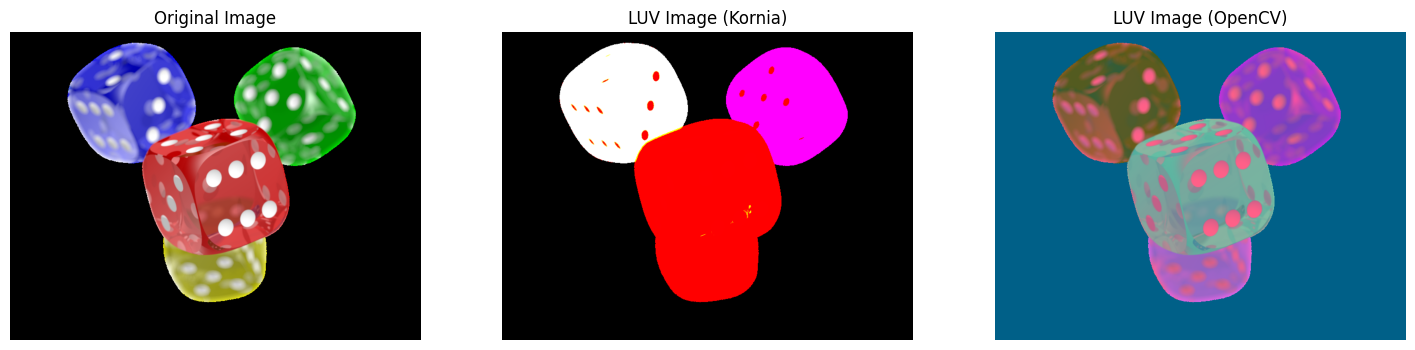

Waktu Eksekusi LUV Kornia (rata-rata dari 10 iterasi): 0.033277 detik
Waktu Eksekusi LUV OpenCV (rata-rata dari 10 iterasi): 0.003559 detik
Ukuran File Sebelum LUV Kornia: 226933 bytes
Ukuran File Setelah LUV Kornia: 5760000 bytes
Ukuran File Sebelum LUV OpenCV: 226933 bytes
Ukuran File Setelah LUV OpenCV: 180279 bytes


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import torch
import kornia
import kornia.color as color
from torchvision import transforms
import time

# URL gambar (ganti dengan URL gambar yang valid)
image_url = "https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png"

# Baca gambar dari URL (OpenCV)
response = requests.get(image_url)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
image_opencv = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Periksa apakah gambar berhasil dibaca (OpenCV)
if image_opencv is not None:
    # Konversi BGR ke RGB (untuk ditampilkan dengan benar di matplotlib)
    image_rgb_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGB)

    # Konversi ke LUV (OpenCV)
    luv_image_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2Luv)

    # Konversi ke LUV (Kornia)
    image_tensor = transforms.ToTensor()(Image.fromarray(image_opencv))

    # Mengukur waktu eksekusi dan ukuran file untuk LUV dari Kornia
    start_time_kornia = time.time()
    size_before_kornia = len(image_array)
    for _ in range(10):
        luv_image_kornia = color.rgb_to_luv(image_tensor.unsqueeze(0))
    end_time_kornia = time.time()
    elapsed_time_kornia = end_time_kornia - start_time_kornia
    size_after_kornia = len(BytesIO(luv_image_kornia.numpy().tobytes()).read())

    # Mengukur waktu eksekusi dan ukuran file untuk LUV dari OpenCV
    start_time_opencv = time.time()
    size_before_opencv = len(image_array)
    for _ in range(10):
        luv_image_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2Luv)
    end_time_opencv = time.time()
    elapsed_time_opencv = end_time_opencv - start_time_opencv
    size_after_opencv = len(BytesIO(cv2.imencode('.png', luv_image_opencv)[1]).read())

    # Set up subplots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

    # Tampilkan gambar original
    axes[0].imshow(image_rgb_opencv)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Tampilkan gambar dalam color space LUV (Kornia)
    axes[1].imshow(luv_image_kornia[0].permute(1, 2, 0))
    axes[1].set_title('LUV Image (Kornia)')
    axes[1].axis('off')

    # Tampilkan gambar dalam color space LUV (OpenCV)
    axes[2].imshow(luv_image_opencv)
    axes[2].set_title('LUV Image (OpenCV)')
    axes[2].axis('off')

    # Tampilkan plot
    plt.show()

    # Tampilkan waktu eksekusi
    print(f"Waktu Eksekusi LUV Kornia (rata-rata dari 10 iterasi): {elapsed_time_kornia / 10:.6f} detik")
    print(f"Waktu Eksekusi LUV OpenCV (rata-rata dari 10 iterasi): {elapsed_time_opencv / 10:.6f} detik")

    # Tampilkan ukuran file
    print(f"Ukuran File Sebelum LUV Kornia: {size_before_kornia} bytes")
    print(f"Ukuran File Setelah LUV Kornia: {size_after_kornia} bytes")
    print(f"Ukuran File Sebelum LUV OpenCV: {size_before_opencv} bytes")
    print(f"Ukuran File Setelah LUV OpenCV: {size_after_opencv} bytes")
else:
    print(f"Failed to read the image from the URL: {image_url}")
